In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras as keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
titanic_df = pd.read_csv('titanic.csv', low_memory=False)

In [3]:
titanic_df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [0]:
titanic_df = titanic_df.drop('Ticket', 1)

In [0]:
titanic_df = titanic_df.drop('Name', 1)

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


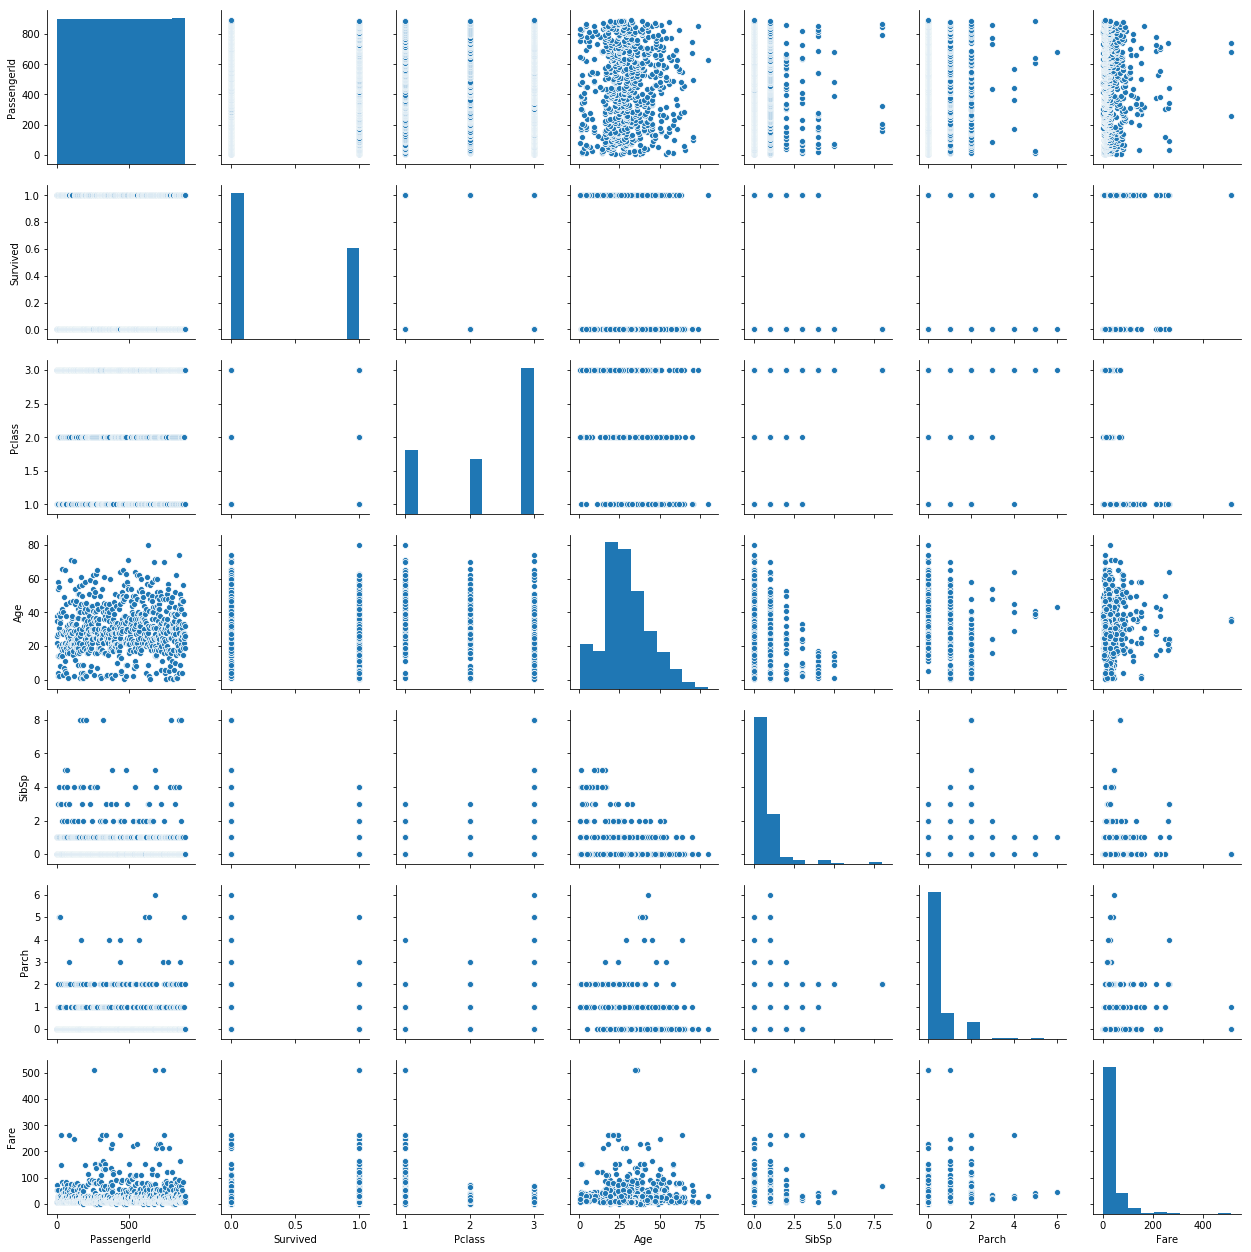

In [9]:
sns.pairplot(titanic_df)

In [0]:
sns.set_style('whitegrid')

Text(0.5, 0, 'Age')

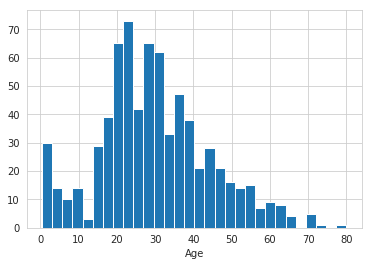

In [11]:
titanic_df['Age'].hist(bins=30)
plt.xlabel('Age')

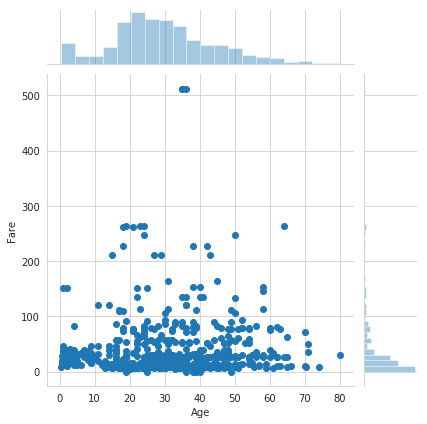

In [12]:
sns.jointplot(data=titanic_df, x='Age', y='Fare')

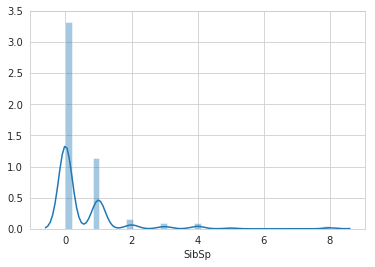

In [13]:
sns.distplot(titanic_df['SibSp'])

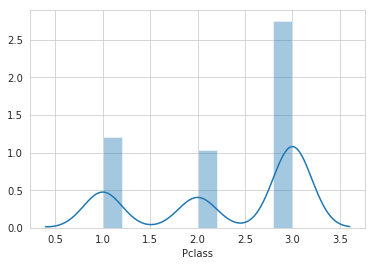

In [14]:
sns.distplot(titanic_df['Pclass'])

In [15]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


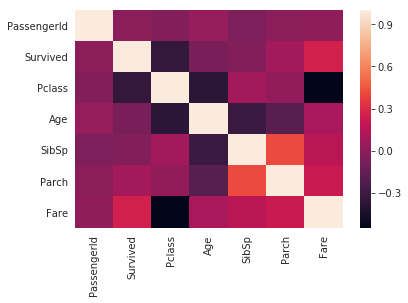

In [16]:
sns.heatmap(titanic_df.corr())

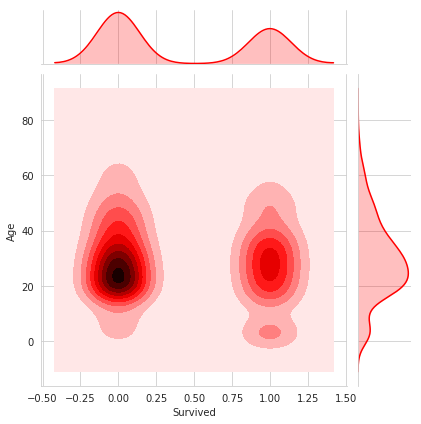

In [17]:
sns.jointplot(data=titanic_df, x='Survived', y='Age', color='red', kind='kde')

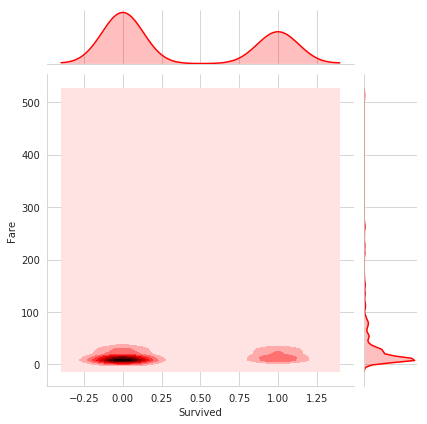

In [18]:
sns.jointplot(data=titanic_df, x='Survived', y='Fare', color='red', kind='kde')

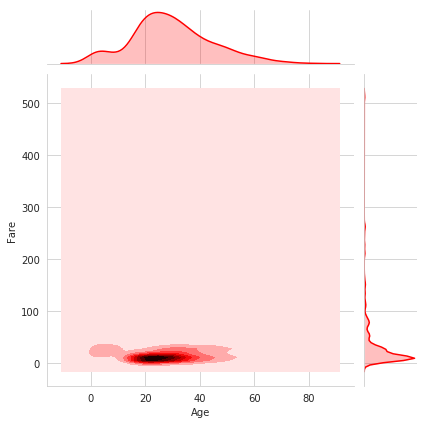

In [19]:
sns.jointplot(data=titanic_df, x='Age', y='Fare', color='red', kind='kde')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


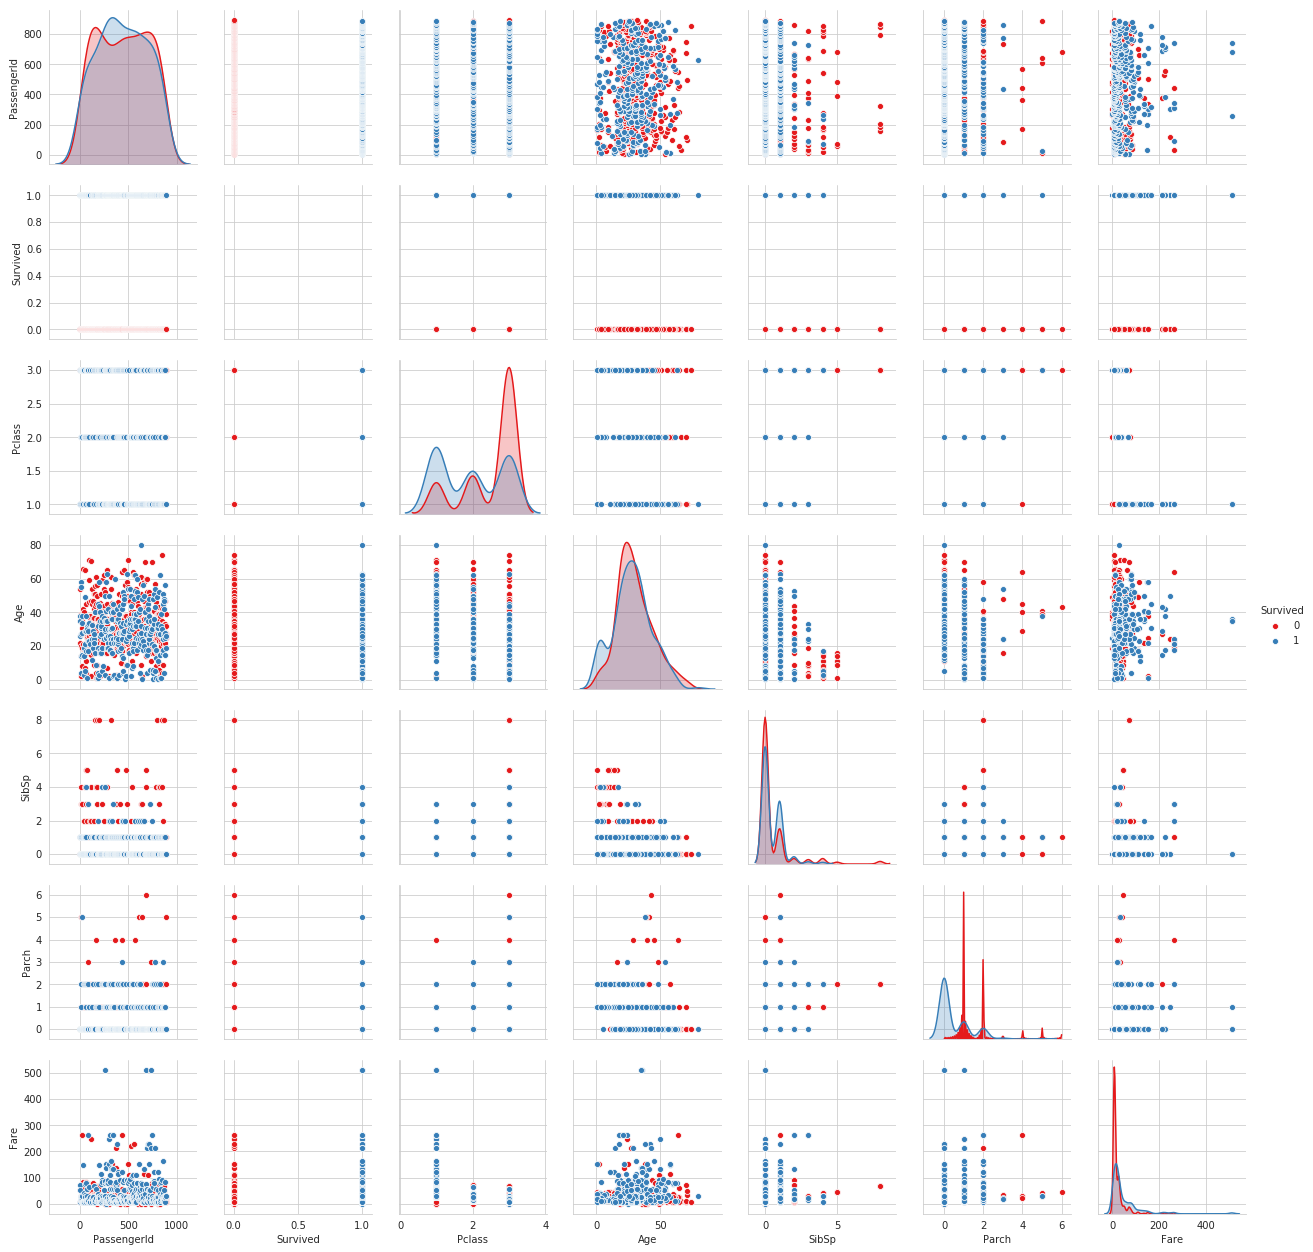

In [20]:
sns.pairplot(data=titanic_df, hue='Survived', palette='Set1')

In [0]:
from sklearn.model_selection import train_test_split

In [22]:
!pip install pydot

In [0]:
titanic_df = titanic_df.drop('Cabin', 1)

In [0]:
titanic_df = titanic_df.drop('PassengerId', 1)

In [25]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [0]:
titanic_df['Age_na'] = titanic_df['Age'].isna()

In [0]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [0]:
titanic_df['Sex'] = titanic_df['Sex'].replace('male', '0')

In [0]:
titanic_df['Sex'] = titanic_df['Sex'].replace('female', '1')

In [0]:
titanic_df['Sex'] = titanic_df['Sex'].replace('female', '1')

In [0]:
titanic_df['Embarked_na'] = titanic_df['Embarked'].isna()

In [32]:
titanic_df['Embarked'].mode()

0    S
dtype: object

In [0]:
titanic_df['Embarked'].fillna(
    value=titanic_df['Embarked'].mode().values[0],
    inplace=True,
)

In [34]:
titanic_df[titanic_df['Embarked_na']]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_na,Embarked_na
61,1,1,1,38.0,0,0,80.0,S,False,True
829,1,1,1,62.0,0,0,80.0,S,False,True


In [0]:
titanic_df = pd.concat([
    titanic_df.drop('Embarked', axis=1),
    pd.get_dummies(titanic_df['Embarked'], prefix='Embarked'),
], axis=1)

In [36]:
titanic_df.head().T

,0,1,2,3,4
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Sex,0,1,1,1,0
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Fare,7.25,71.2833,7.925,53.1,8.05
Age_na,False,False,False,False,False
Embarked_na,False,False,False,False,False
Embarked_C,0,1,0,0,0


In [37]:
titanic_df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

In [38]:
titanic_df['Age_na'].describe()

count       891
unique        2
top       False
freq        714
Name: Age_na, dtype: object

In [0]:
all_features = titanic_df.drop('Survived', axis=1)

In [40]:
print(titanic_df['Age'].mean())

29.699117647058763


In [41]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_na,Embarked_na,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,False,False,0,0,1
1,1,1,1,38.000000,1,0,71.2833,False,False,1,0,0
2,1,3,1,26.000000,0,0,7.9250,False,False,0,0,1
3,1,1,1,35.000000,1,0,53.1000,False,False,0,0,1
4,0,3,0,35.000000,0,0,8.0500,False,False,0,0,1
5,0,3,0,29.699118,0,0,8.4583,True,False,0,1,0
6,0,1,0,54.000000,0,0,51.8625,False,False,0,0,1
7,0,3,0,2.000000,3,1,21.0750,False,False,0,0,1
8,1,3,1,27.000000,0,2,11.1333,False,False,0,0,1
9,1,2,1,14.000000,1,0,30.0708,False,False,1,0,0


In [0]:
train_data, test_data, train_labels, test_labels = train_test_split(
    all_features, titanic_df['Survived'], test_size=0.2, random_state=42)

In [43]:
[x.shape for x in (train_data, test_data, train_labels, test_labels)]

[(712, 11), (179, 11), (712,), (179,)]

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
model = LogisticRegression(solver='lbfgs')

In [46]:
model.fit(train_data, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
model.coef_, model.intercept_

(array([[-9.26764490e-01,  2.57203038e+00, -3.00338364e-02,
         -2.81174159e-01, -1.27653177e-01,  2.25165156e-03,
         -3.90502886e-01,  1.12474824e-01,  5.71941889e-01,
          5.62354048e-01,  8.24442011e-02]]), array([1.48651016]))

In [0]:
test_predictions = model.predict(test_data)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [50]:
print(classification_report(test_labels, test_predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [51]:
print(accuracy_score(test_labels, test_predictions))

0.8212290502793296


In [52]:
print(confusion_matrix(test_labels, test_predictions))

[[91 14]
 [18 56]]


Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree = DecisionTreeClassifier()

In [55]:
dtree.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
test_preds = dtree.predict(test_data)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
print(classification_report(test_labels, test_preds))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       105
           1       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [59]:
print(accuracy_score(test_labels, test_preds))

0.7932960893854749


In [60]:
print(confusion_matrix(test_labels, test_preds))

[[86 19]
 [18 56]]


Conclusions: Decision Tree model is not better than LogisticRegression;)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc = RandomForestClassifier(n_estimators=10)

In [63]:
rfc.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
test_preds = rfc.predict(test_data)

In [65]:
print(classification_report(test_labels, test_preds))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [66]:
print(accuracy_score(test_labels, test_preds))

0.8156424581005587


In [67]:
print(confusion_matrix(test_labels, test_preds))

[[92 13]
 [20 54]]


In [0]:
rfc = RandomForestClassifier(n_estimators=30)

In [69]:
rfc.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
test_preds = rfc.predict(test_data)

In [71]:
print(classification_report(test_labels, test_preds))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [72]:
print(accuracy_score(test_labels, test_preds))

0.8100558659217877


In [73]:
print(confusion_matrix(test_labels, test_preds))

[[91 14]
 [20 54]]


In [0]:
rfc = RandomForestClassifier(n_estimators=50)

In [75]:
rfc.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
test_preds = rfc.predict(test_data)

In [77]:
print(classification_report(test_labels, test_preds))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [78]:
print(accuracy_score(test_labels, test_preds))

0.8212290502793296


In [79]:
print(confusion_matrix(test_labels, test_preds))

[[91 14]
 [18 56]]


In [0]:
rfc = RandomForestClassifier(n_estimators=75)

In [81]:
rfc.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
test_preds = rfc.predict(test_data)

In [83]:
print(classification_report(test_labels, test_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [84]:
print(accuracy_score(test_labels, test_preds))

0.8156424581005587


In [85]:
print(confusion_matrix(test_labels, test_preds))

[[90 15]
 [18 56]]


In [0]:
fc = RandomForestClassifier(n_estimators=100)

In [87]:
rfc.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
test_preds = rfc.predict(test_data)

In [89]:
print(classification_report(test_labels, test_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [90]:
print(accuracy_score(test_labels, test_preds))

0.8100558659217877


In [91]:
print(confusion_matrix(test_labels, test_preds))

[[90 15]
 [19 55]]


In [0]:
rfc = RandomForestClassifier(n_estimators=200)

In [93]:
rfc.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
test_preds = rfc.predict(test_data)

In [95]:
print(classification_report(test_labels, test_preds))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [96]:
print(accuracy_score(test_labels, test_preds))

0.8212290502793296


In [97]:
print(confusion_matrix(test_labels, test_preds))

[[92 13]
 [19 55]]


Summary: The best model so far is Random Forest model with 200 estimators (I ve tried with, 200, 100, 75, 50, 30, 10) is better than simple Random Forest and Logistic Regression model, but still is bad in predicting false positives and false negatives (who didnt survived):
accuracy 82,1%

## DL model

In [0]:
#no scaller yet

In [99]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_na,Embarked_na,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,0,0,1
1,1,1,1,38.0,1,0,71.2833,False,False,1,0,0
2,1,3,1,26.0,0,0,7.9250,False,False,0,0,1
3,1,1,1,35.0,1,0,53.1000,False,False,0,0,1
4,0,3,0,35.0,0,0,8.0500,False,False,0,0,1


In [0]:
cont_features = ['Age', 'Fare'] # geriau neimti tiesiai is raw df, o susikurti atskira column su reikalingais pavadinimais

In [0]:
scaler = StandardScaler()

In [0]:
scaler_features = scaler.fit_transform(titanic_df[cont_features]) # we could use feature_columns insted, but axis=1 as only columns not rows

In [103]:
scaler_features

array([[-0.5924806 , -0.50244517],
       [ 0.63878901,  0.78684529],
       [-0.2846632 , -0.48885426],
       ...,
       [ 0.        , -0.17626324],
       [-0.2846632 , -0.04438104],
       [ 0.17706291, -0.49237783]])

In [104]:
scaler_features.shape

(891, 2)

In [0]:
titanic_df[cont_features] = scaler_features

In [106]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_na,Embarked_na,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,-0.592481,1,0,-0.502445,False,False,0,0,1
1,1,1,1,0.638789,1,0,0.786845,False,False,1,0,0
2,1,3,1,-0.284663,0,0,-0.488854,False,False,0,0,1
3,1,1,1,0.407926,1,0,0.420730,False,False,0,0,1
4,0,3,0,0.407926,0,0,-0.486337,False,False,0,0,1
5,0,3,0,0.000000,0,0,-0.478116,True,False,0,1,0
6,0,1,0,1.870059,0,0,0.395814,False,False,0,0,1
7,0,3,0,-2.131568,3,1,-0.224083,False,False,0,0,1
8,1,3,1,-0.207709,0,2,-0.424256,False,False,0,0,1
9,1,2,1,-1.208115,1,0,-0.042956,False,False,1,0,0


In [108]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_na,Embarked_na,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,-0.592481,1,0,-0.502445,False,False,0,0,1
1,1,1,1,0.638789,1,0,0.786845,False,False,1,0,0
2,1,3,1,-0.284663,0,0,-0.488854,False,False,0,0,1
3,1,1,1,0.407926,1,0,0.420730,False,False,0,0,1
4,0,3,0,0.407926,0,0,-0.486337,False,False,0,0,1


In [0]:
feature_columns = titanic_df.columns.to_list()
feature_columns.remove('Survived')

In [110]:
feature_columns

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Age_na',
 'Embarked_na',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [111]:
scaler_features

array([[-0.5924806 , -0.50244517],
       [ 0.63878901,  0.78684529],
       [-0.2846632 , -0.48885426],
       ...,
       [ 0.        , -0.17626324],
       [-0.2846632 , -0.04438104],
       [ 0.17706291, -0.49237783]])

In [0]:
df_features = titanic_df.copy()

In [113]:
df_features.head().T

,0,1,2,3,4
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Sex,0,1,1,1,0
Age,-0.592481,0.638789,-0.284663,0.407926,0.407926
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Fare,-0.502445,0.786845,-0.488854,0.42073,-0.486337
Age_na,False,False,False,False,False
Embarked_na,False,False,False,False,False
Embarked_C,0,1,0,0,0


In [114]:
df_features.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02,891.000000,891.000000,891.000000
mean,0.383838,2.308642,2.562796e-16,0.523008,0.381594,-4.373606e-17,0.188552,0.086420,0.725028
std,0.486592,0.836071,1.000562e+00,1.102743,0.806057,1.000562e+00,0.391372,0.281141,0.446751
min,0.000000,1.000000,-2.253155e+00,0.000000,0.000000,-6.484217e-01,0.000000,0.000000,0.000000
25%,0.000000,2.000000,-5.924806e-01,0.000000,0.000000,-4.891482e-01,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000e+00,0.000000,0.000000,-3.573909e-01,0.000000,0.000000,1.000000
75%,1.000000,3.000000,4.079260e-01,1.000000,0.000000,-2.424635e-02,0.000000,0.000000,1.000000
max,1.000000,3.000000,3.870872e+00,8.000000,6.000000,9.667167e+00,1.000000,1.000000,1.000000


In [0]:
raw_df = pd.read_csv('titanic.csv', low_memory=False)

In [0]:
train_data, test_data, train_labels, test_labels = train_test_split(df_features.drop('Survived', 1), df_features["Survived"], test_size=0.4) # took all data set of it 40%

In [0]:
val_data, test_data, val_labels, test_labels = train_test_split(test_data, test_labels, test_size=0.5) # we take of it 40% again 50%

In [0]:
def make_classifier(n_layers, layer_size, n_classes, final_activation, input_shape):
    layers = [tf.keras.layers.BatchNormalization(input_shape=input_shape)] # it takes your data and make normalization for not all data but for one batch, batch we take piece of dta set into power of 2, it could be 32, 16, 8, 4... one of this batch
    #you could skip "scaler_features" part and it would work
    #always put input_shape!!!
    for _ in range(n_layers):
        pass
        layers.extend([ # extend let to add all values to a lists
            tf.keras.layers.Dense(layer_size, kernel_initializer='he_uniform'),
            tf.keras.layers.LeakyReLU(),
            tf.keras.layers.BatchNormalization(), # always end with comma, when its ended not in one line
        ])
    layers.append(tf.keras.layers.Dense(n_classes, activation=final_activation))
    
#     model = tf.keras.Sequential() it could be possible to do that - we shouldnt do that, as we write is better
#     model.add(tf.keras.layers.LeakyReLU())
#     model.add(tf.keras.layers.LeakyReLU())
    
    return tf.keras.Sequential(layers)



In [119]:
dnnc = make_classifier(3, 32, 1, 'sigmoid', train_data.values.shape[1:])

W0718 17:08:30.897151 140038599194496 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [120]:
train_data.values.shape

(534, 11)

In [121]:
train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Age_na,Embarked_na,Embarked_C,Embarked_Q,Embarked_S
128,3,1,0.000000,1,1,-0.198244,True,False,1,0,0
281,3,0,-0.130754,0,0,-0.490280,False,False,0,0,1
597,3,0,1.485287,0,0,-0.648422,False,False,0,0,1
60,3,0,-0.592481,0,0,-0.502864,False,False,1,0,0
349,3,0,0.946606,0,0,-0.474005,False,False,0,0,1
278,3,0,-1.746796,4,1,-0.061999,False,False,0,1,0
241,3,1,0.000000,1,0,-0.336334,True,False,0,1,0
223,3,0,0.000000,0,0,-0.489442,True,False,0,0,1
585,1,1,-0.900298,0,2,0.955306,False,False,0,0,1
710,1,1,-0.438572,0,0,0.348330,False,False,1,0,0


In [0]:
LR = 3e-3 #
N_EPOCHS = 80
BATCH_SIZE = 64


In [123]:
dnnc.compile(
    optimizer=tf.keras.optimizers.Adam(lr=LR), 
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.binary_accuracy,
        tf.keras.metrics.Precision()

    ]
)

W0718 17:08:31.486097 140038599194496 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [124]:
dnnc.fit(
    x=train_data.values,
    y=train_labels.values,
    validation_data=(val_data.values, val_labels.values),
    batch_size=BATCH_SIZE, 
    epochs=N_EPOCHS,
    shuffle=True,
)

Train on 534 samples, validate on 178 samples
Epoch 1/80
534/534 [==============================] - 1s 949us/sample - loss: 0.7448 - binary_accuracy: 0.5449 - precision: 0.4202 - val_loss: 0.6931 - val_binary_accuracy: 0.6348 - val_precision: 1.0000
Epoch 2/80
534/534 [==============================] - 0s 61us/sample - loss: 0.4976 - binary_accuracy: 0.7884 - precision: 0.7192 - val_loss: 0.6790 - val_binary_accuracy: 0.6798 - val_precision: 0.9375
Epoch 3/80
534/534 [==============================] - 0s 62us/sample - loss: 0.4648 - binary_accuracy: 0.8109 - precision: 0.7538 - val_loss: 0.6702 - val_binary_accuracy: 0.6798 - val_precision: 0.8889
Epoch 4/80
534/534 [==============================] - 0s 61us/sample - loss: 0.4457 - binary_accuracy: 0.8109 - precision: 0.7672 - val_loss: 0.6612 - val_binary_accuracy: 0.6798 - val_precision: 0.8500
Epoch 5/80
534/534 [==============================] - 0s 62us/sample - loss: 0.4222 - binary_accuracy: 0.8371 - precision: 0.8177 - val_loss:

In [0]:
dnnc.save('dnnc1.h5')

In [126]:
dnnc = tf.keras.models.load_model('dnnc1.h5')

W0718 17:08:36.858208 140038599194496 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0718 17:08:36.860882 140038599194496 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0718 17:08:37.219664 140038599194496 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecat

In [0]:
test_preds = dnnc.predict(test_data.values)

In [128]:
test_preds[:3] > 0.5, test_labels[:3].values

(array([[False],
        [False],
        [False]]), array([1, 0, 0]))

In [0]:
TRESHOLD = 0.5

In [130]:
print(confusion_matrix(test_labels, test_preds > TRESHOLD))

[[101   9]
 [ 30  39]]


<function accuracy_score at 0x7f5d05cb9488>


In [131]:
print(classification_report(test_labels, test_preds > TRESHOLD))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       110
           1       0.81      0.57      0.67        69

    accuracy                           0.78       179
   macro avg       0.79      0.74      0.75       179
weighted avg       0.79      0.78      0.77       179



Results are: accuracy only 78%, wors than by Random Forest model

## Random Forest with Grid Search

In [0]:
train_data_cv = pd.concat([train_data, val_data], axis=0)
train_labels_cv = pd.concat([train_labels, val_labels], axis=0)

In [0]:
rfc_gs = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        "n_estimators": np.linspace(10, 500, 3).astype(int),
        "max_features": ['sqrt', 'log2', 0.1],
        "min_samples_leaf": np.linspace(1, 100, 3).astype(int),
        "max_depth": np.linspace(10, 100, 3).astype(int),
    },
    n_jobs=-1,
    cv=5,
    verbose=1,
)

In [134]:
np.linspace(10, 500, 4).astype(int)

array([ 10, 173, 336, 500])

In [135]:
rfc_gs.fit(train_data_cv, train_labels_cv)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  1.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
joblib.dump(rfc_gs, 'rfc_gs.pkl')
rfc_gs = joblib.load('rfc_gs.pkl')

In [137]:
rfc_gs.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 500}

In [138]:
rfc_gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [139]:
rfc_gs.best_score_

0.8314606741573034

In [0]:
rfc_gs_test_preds = rfc_gs.predict(test_data)

In [141]:
print(confusion_matrix(test_labels, rfc_gs_test_preds))

[[104   6]
 [ 27  42]]


In [142]:
print(classification_report(test_labels, rfc_gs_test_preds))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       110
           1       0.88      0.61      0.72        69

    accuracy                           0.82       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.83      0.82      0.81       179



In [0]:
rfc_rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions={
        "n_estimators": np.arange(10, 500),
        "min_samples_leaf": np.arange(1, 100),
        "max_depth": np.arange(1, 100),
        "max_features": ['sqrt', 'log2', 0.1],
    },
    n_iter=100,
    cv=5,
    n_jobs=-1,
    verbose=1,
)

In [144]:
rfc_rs.fit(train_data_cv, train_labels_cv)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 486 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [0]:
joblib.dump(rfc_rs, 'rfc_rs.pkl')
rfc_rs = joblib.load('rfc_rs.pkl')

In [146]:
rfc_rs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=58, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=476,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [147]:
rfc_rs.best_params_

{'max_depth': 58,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'n_estimators': 476}

In [148]:
rfc_rs.best_score_

0.8370786516853933

In [0]:
rfc_rs_test_preds = rfc_rs.predict(test_data)

In [150]:
print(confusion_matrix(test_labels, rfc_rs_test_preds))

[[107   3]
 [ 30  39]]


In [151]:
print(classification_report(test_labels, rfc_rs_test_preds))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87       110
           1       0.93      0.57      0.70        69

    accuracy                           0.82       179
   macro avg       0.85      0.77      0.78       179
weighted avg       0.84      0.82      0.80       179



Summary: 
    
The best results are from Random Forest (Grid search): 83,7%

## Creating the submission file

In [0]:
test = pd.read_csv('./test.csv', low_memory=False)

In [153]:
#missing data

def missing_data_total(test):
    total = test.isnull().sum().sort_values(ascending=False)
    percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(25)

print("missing training data",missing_data_total(test))
print("missing testing data" ,missing_data_total(test))  

missing training data              Total   Percent
Cabin          327  0.782297
Age             86  0.205742
Fare             1  0.002392
Embarked         0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
PassengerId      0  0.000000
missing testing data              Total   Percent
Cabin          327  0.782297
Age             86  0.205742
Fare             1  0.002392
Embarked         0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
PassengerId      0  0.000000


In [154]:
len(test['Cabin'].unique())

77

In [155]:
set(titanic_df.columns)-set(test.columns)

{'Age_na', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_na', 'Survived'}

In [156]:
len(test['Fare'].unique())

170

In [157]:
test['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
5        9.2250
6        7.6292
7       29.0000
8        7.2292
9       24.1500
10       7.8958
11      26.0000
12      82.2667
13      26.0000
14      61.1750
15      27.7208
16      12.3500
17       7.2250
18       7.9250
19       7.2250
20      59.4000
21       3.1708
22      31.6833
23      61.3792
24     262.3750
25      14.5000
26      61.9792
27       7.2250
28      30.5000
29      21.6792
         ...   
388      7.7500
389     21.0750
390     93.5000
391     39.4000
392     20.2500
393     10.5000
394     22.0250
395     60.0000
396      7.2500
397     79.2000
398      7.7750
399      7.7333
400    164.8667
401     21.0000
402     59.4000
403     47.1000
404     27.7208
405     13.8625
406     10.5000
407    211.5000
408      7.7208
409     13.7750
410      7.7500
411     90.0000
412      7.7750
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418,

In [0]:
test = test.drop('Ticket', 1)

In [0]:
test = test.drop('Name', 1)

In [0]:
test = test.drop('Cabin', 1)

In [0]:
test['Age_na'] = test['Age'].isna()

In [0]:
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [0]:
test['Fare_na'] = test['Fare'].isna()

In [0]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [0]:
test['Sex'] = test['Sex'].replace('male', '0')

In [0]:
test['Sex'] = test['Sex'].replace('female', '1')

In [0]:
test['Embarked_C']=0

In [0]:
test['Embarked_Q']=0

In [0]:
test['Embarked_S']=0

In [0]:
test['Embarked_na']=0

In [0]:
test=test.drop('Embarked', 1)

In [172]:
test.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Sex,0,1,0,0,1
Age,34.5,47,62,27,22
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Fare,7.8292,7,9.6875,8.6625,12.2875
Age_na,False,False,False,False,False
Fare_na,False,False,False,False,False
Embarked_C,0,0,0,0,0


In [173]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Age_na,Fare_na,Embarked_C,Embarked_Q,Embarked_S,Embarked_na
0,892,3,0,34.5,0,0,7.8292,False,False,0,0,0,0
1,893,3,1,47.0,1,0,7.0000,False,False,0,0,0,0
2,894,2,0,62.0,0,0,9.6875,False,False,0,0,0,0
3,895,3,0,27.0,0,0,8.6625,False,False,0,0,0,0
4,896,3,1,22.0,1,1,12.2875,False,False,0,0,0,0


In [174]:
len(test.columns) == len(titanic_df.columns)



False

In [175]:
len(titanic_df.columns)

12

In [176]:
len(test.columns)

13

In [177]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Age_na         418 non-null bool
Fare_na        418 non-null bool
Embarked_C     418 non-null int64
Embarked_Q     418 non-null int64
Embarked_S     418 non-null int64
Embarked_na    418 non-null int64
dtypes: bool(2), float64(2), int64(8), object(1)
memory usage: 36.8+ KB


In [178]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Age_na         891 non-null bool
Embarked_na    891 non-null bool
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: bool(2), float64(2), int64(4), object(1), uint8(3)
memory usage: 53.2+ KB


In [179]:
pred_test = rfc.predict(test)

ValueError: ignored

In [0]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [0]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [0]:
pred_test = rfc.predict(feats)

In [0]:
final = np.exp(pred_test)

In [0]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

In [0]:
submission['SalePrice'] = final
submission.head()

In [0]:
# submission['SalePrice'] = final_predictions

In [0]:
# subm = test[['PassengerId', 'Survived']]

In [0]:
submission.to_csv('kaggle_subm.csv', index=False)